In [4]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv("restaurant-1-orders.csv")


# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

print("\nDataset Information:")
print(data.info())


Dataset Preview:
   Order Number        Order Date            Item Name  Quantity  \
0         16118  03/08/2019 20:25        Plain Papadum         2   
1         16118  03/08/2019 20:25     King Prawn Balti         1   
2         16118  03/08/2019 20:25          Garlic Naan         1   
3         16118  03/08/2019 20:25        Mushroom Rice         1   
4         16118  03/08/2019 20:25  Paneer Tikka Masala         1   

   Product Price  Total products  
0           0.80               6  
1          12.95               6  
2           2.95               6  
3           3.95               6  
4           8.95               6  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    74818 non-null  int64  
 1   Order Date      74818 non-null  object 
 2   Item Name       74818 non-null  object 
 3   Quan

In [5]:
# Count the frequency of each item
item_frequency = data.groupby('Item Name')['Quantity'].sum().sort_values(ascending=False)

# Display the top 10 most frequently sold items
top_items = item_frequency.head(10)
print("Top 10 Most Frequently Sold Items:")
print(top_items)


Top 10 Most Frequently Sold Items:
Item Name
Plain Papadum           10648
Pilau Rice               6367
Plain Naan               4983
Garlic Naan              3318
Plain Rice               2964
Onion Bhajee             2749
Mango Chutney            2504
Chicken Tikka Masala     2473
Chapati                  1935
Mint Sauce               1840
Name: Quantity, dtype: int64


In [6]:
# Create a pivot table for transactional format (One-Hot Encoding)
basket = data.groupby(['Order Number', 'Item Name'])['Quantity'].sum().unstack().fillna(0)

# Convert quantities to 1 (item present) and 0 (item absent)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the transactional dataset
print("Transactional Dataset:")
print(basket.head())


C:\Users\omkar maurya\AppData\Local\Temp\ipykernel_24316\2522687093.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Transactional Dataset:
Item Name     Aloo Chaat  Aloo Gobi  Aloo Methi  Baingan Hari Mirch  \
Order Number                                                          
630                    0          0           0                   0   
647                    0          0           0                   0   
648                    0          0           0                   0   
651                    0          0           0                   0   
764                    0          0           0                   0   

Item Name     Bengal Fish Biryani  Bengal Fish Karahi  Bengal Fry Fish  \
Order Number                                                             
630                             0                   0                0   
647                             0                   0                0   
648                             0                   0                0   
651                             0                   0                0   
764                             0  

In [7]:
# Find frequent itemsets with minimum support of 1%
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)


C:\Users\omkar maurya\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
      support                                           itemsets
0    0.021199                                       (Aloo Chaat)
1    0.045906                                        (Aloo Gobi)
2    0.014630                               (Baingan Hari Mirch)
3    0.017467                                    (Bhindi Bhajee)
4    0.034784                                            (Bhuna)
..        ...                                                ...
540  0.011719  (Plain Papadum, Mint Sauce, Pilau Rice, Red Sa...
541  0.010823  (Onion Bhajee, Plain Papadum, Pilau Rice, Pesh...
542  0.011644  (Plain Naan, Plain Papadum, Pilau Rice, Onion ...
543  0.010898  (Mango Chutney, Plain Papadum, Onion Chutney, ...
544  0.010002  (Mango Chutney, Plain Papadum, Onion Chutney, ...

[545 rows x 2 columns]


In [8]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort rules by lift
sorted_rules = rules.sort_values(by='lift', ascending=False)

# Display the top 10 association rules
print("Top 10 Association Rules:")
print(sorted_rules.head(10))


Top 10 Association Rules:
                                     antecedents  \
1868                 (Mint Sauce, Onion Chutney)   
1853   (Plain Papadum, Red Sauce, Mango Chutney)   
1857  (Plain Papadum, Mint Sauce, Onion Chutney)   
1864                  (Red Sauce, Mango Chutney)   
1867                  (Plain Papadum, Red Sauce)   
1854  (Mint Sauce, Onion Chutney, Mango Chutney)   
1503                  (Red Sauce, Mango Chutney)   
1498                 (Mint Sauce, Onion Chutney)   
1752                  (Plain Papadum, Red Sauce)   
1753                 (Mint Sauce, Onion Chutney)   

                                     consequents  antecedent support  \
1868   (Plain Papadum, Red Sauce, Mango Chutney)            0.035829   
1853                 (Mint Sauce, Onion Chutney)            0.020378   
1857                  (Red Sauce, Mango Chutney)            0.031126   
1864  (Plain Papadum, Mint Sauce, Onion Chutney)            0.025155   
1867  (Mint Sauce, Onion Chutney, Mango C

In [9]:
# Save the top items and rules to CSV files for further reference
top_items.to_csv("top_items.csv")
sorted_rules.to_csv("association_rules.csv")

print("Results saved as 'top_items.csv' and 'association_rules.csv'.")


Results saved as 'top_items.csv' and 'association_rules.csv'.


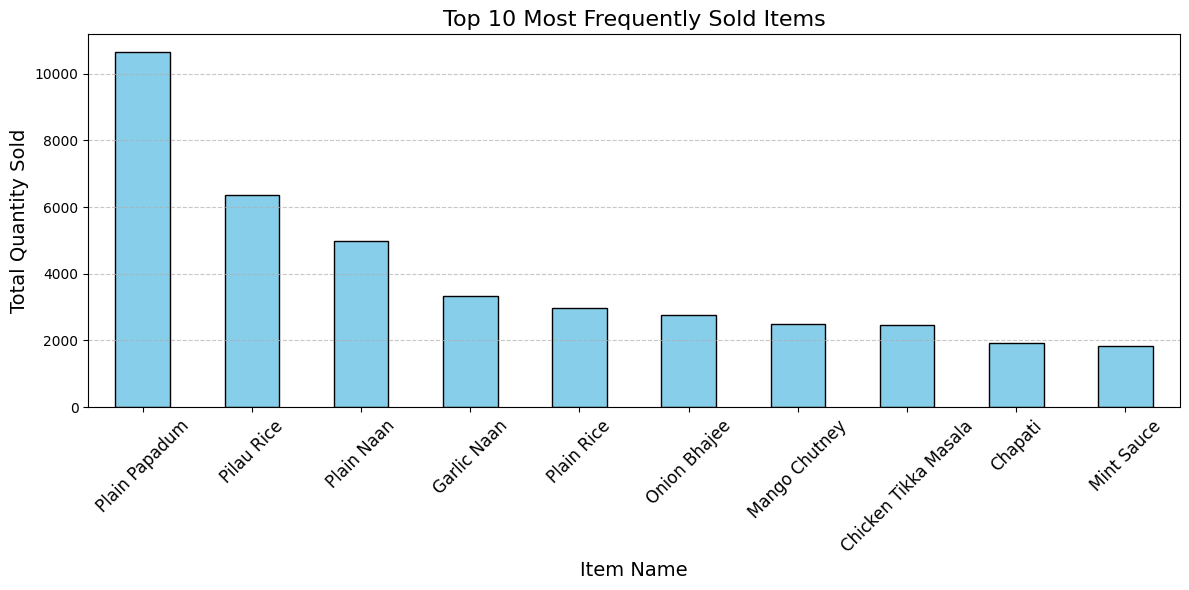

In [10]:
import matplotlib.pyplot as plt

# Plot the top 10 items
plt.figure(figsize=(12, 6))
top_items.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Most Frequently Sold Items", fontsize=16)
plt.xlabel("Item Name", fontsize=14)
plt.ylabel("Total Quantity Sold", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


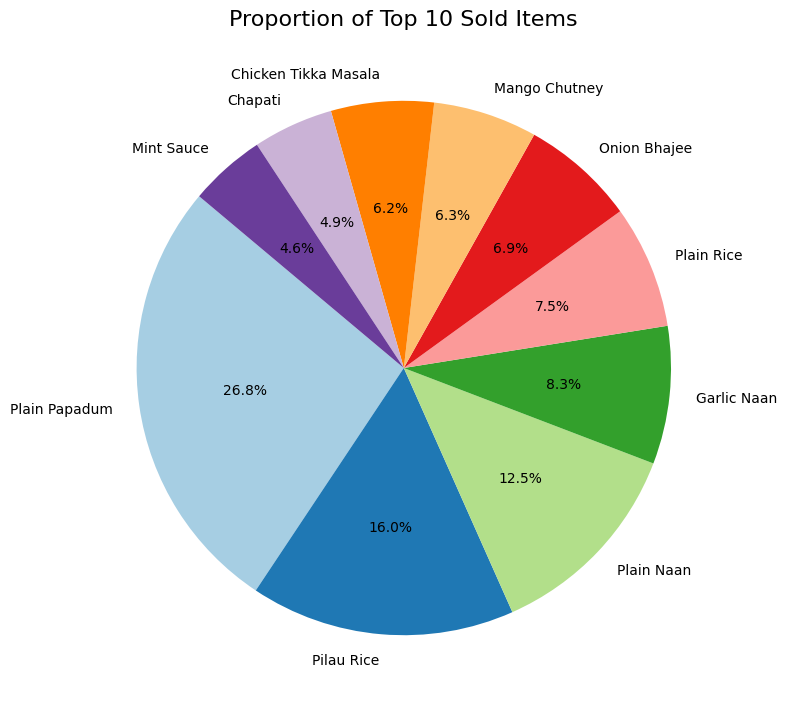

In [11]:
# Pie chart for the top 10 items
plt.figure(figsize=(8, 8))
top_items.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Proportion of Top 10 Sold Items", fontsize=16)
plt.ylabel("")  # Remove y-axis label
plt.tight_layout()
plt.show()


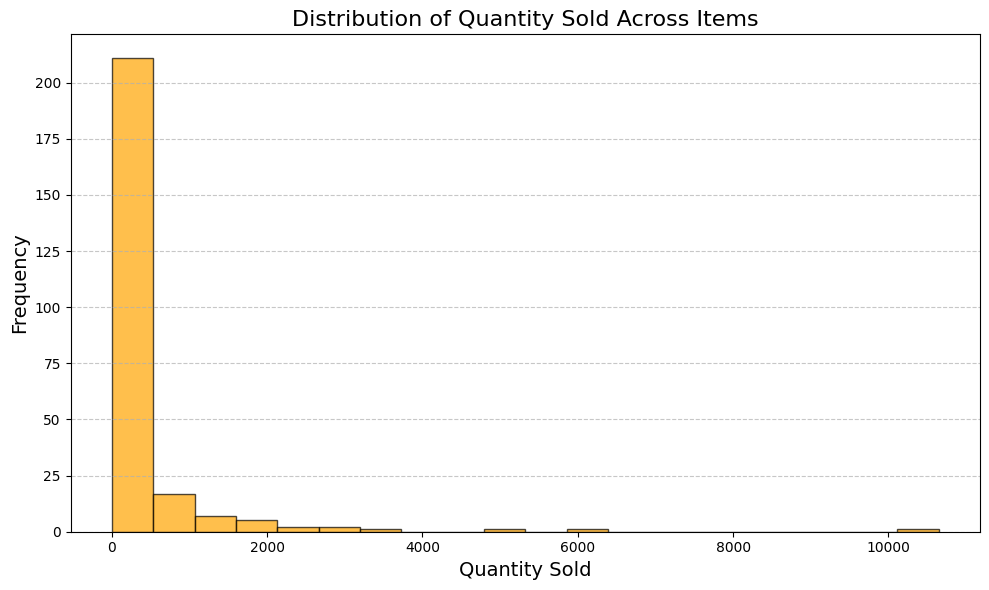

In [12]:
# Histogram for quantity distribution
plt.figure(figsize=(10, 6))
item_frequency.plot(kind='hist', bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title("Distribution of Quantity Sold Across Items", fontsize=16)
plt.xlabel("Quantity Sold", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


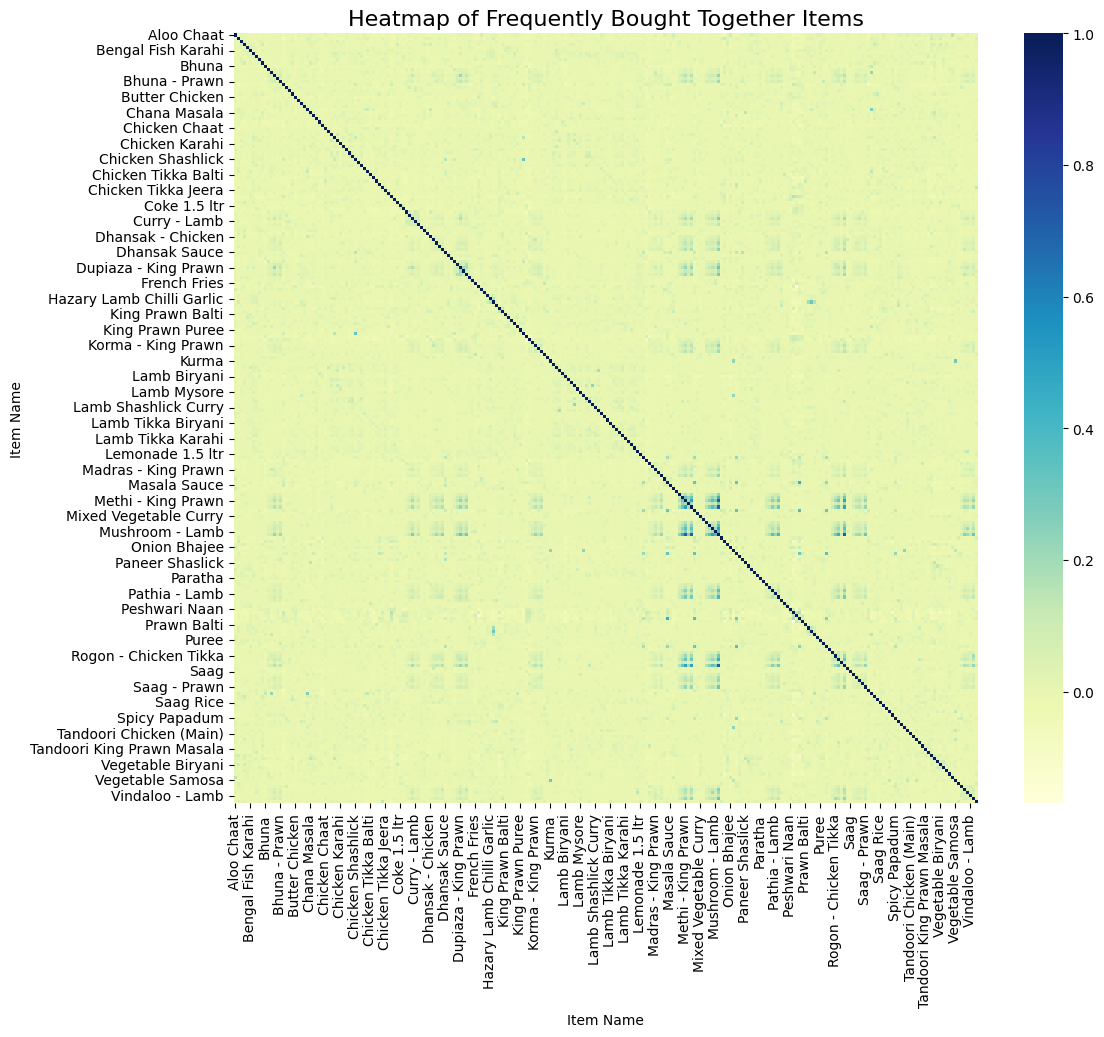

In [13]:
import seaborn as sns

# Compute a correlation matrix for the transactional dataset
correlation_matrix = basket.corr()

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=False)
plt.title("Heatmap of Frequently Bought Together Items", fontsize=16)
plt.show()

